# 1.) Pull in Data and Convert ot Monthly

In [24]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [26]:
df.head()

,Adj Close
Date,
1980-12-31,0.117887
1981-01-31,0.097591
1981-02-28,0.091546
1981-03-31,0.084637
1981-04-30,0.098023


In [27]:
df['Diff'] = df['Adj Close'].diff().shift(-1)
df['Target'] = np.sign(df['Diff'])
df['Premium'] = 0.08*df['Adj Close']

# 3.) Pull in X data, normalize and build a LogReg on column 2

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [29]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [30]:
y = df.loc[:"2023-09-30","Target"].copy()

In [31]:
df = df.loc[:"2023-09-30",:].copy()

In [32]:
logreg = LogisticRegression()
logreg.fit(X,y)

LogisticRegression()

# 4.) Add columns, prediction and profits.

In [34]:
y_pred = logreg.predict(X)

In [35]:
df['Predictions'] = y_pred

In [36]:
df['Profits'] = 0

In [37]:
df.loc[(df["Target"] == 1) & (df["Predictions"] == 1), "Profits"] = df["Premium"]

In [38]:
df.loc[(df["Target"] == -1) & (df["Predictions"] == 1), "Profits"] = (100*df['Diff']) + df["Premium"]

# 5.) Plot profits over time

[]

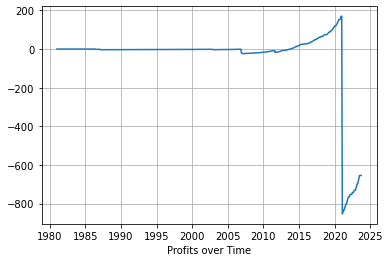

In [40]:
plt.plot(np.cumsum(df["Profits"]))
plt.grid()
plt.xlabel("Profits over Time")
plt.plot()

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.